In [ ]:
!pip install --pre pycaret

#Starting the Session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset connection and print first five value

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Clean_Thyroid Detection.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,41,F,f,f,f,f,f,f,f,f,...,1.30,t,2.5,t,125.0,t,1.14,t,109.0,Negative
1,23,F,f,f,f,f,f,f,f,f,...,4.10,t,2.0,t,102.0,f,0.00,f,0.0,Negative
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,0.0,t,109.0,t,0.91,t,120.0,Negative
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175.0,f,0.00,f,0.0,Negative
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61.0,t,0.87,t,70.0,Negative


#Checking the null values

In [ ]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
Classes                      0
dtype: int64

#Checking the column data ,type, and nonnull values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   int64  
 1   sex                        3771 non-null   object 
 2   on thyroxine               3771 non-null   object 
 3   query on thyroxine         3771 non-null   object 
 4   on antithyroid medication  3771 non-null   object 
 5   sick                       3771 non-null   object 
 6   pregnant                   3771 non-null   object 
 7   thyroid surgery            3771 non-null   object 
 8   I131 treatment             3771 non-null   object 
 9   query hypothyroid          3771 non-null   object 
 10  query hyperthyroid         3771 non-null   object 
 11  lithium                    3771 non-null   object 
 12  goitre                     3771 non-null   object 
 13  tumor                      3771 non-null   objec

#The data set doesn't have any null value but there are some special characters is there. So converting those in to boolean.

In [ ]:
df.replace({'f':0, 't':1,'Negative' :0,'Hypothyroidism':1 ,'Hyperthyroidism':2}, inplace=True)
df.replace({'F':0, 'M':1}, inplace=True)

#Checking the records


In [ ]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,41,0,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,0
1,23,0,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,0.00,0,0.0,0
2,46,1,0,0,0,0,0,0,0,0,...,0.98,0,0.0,1,109.0,1,0.91,1,120.0,0
3,70,0,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,0.00,0,0.0,0
4,70,0,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,0


#Importing required libraries

In [ ]:
#importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Plotting the distribution of age**

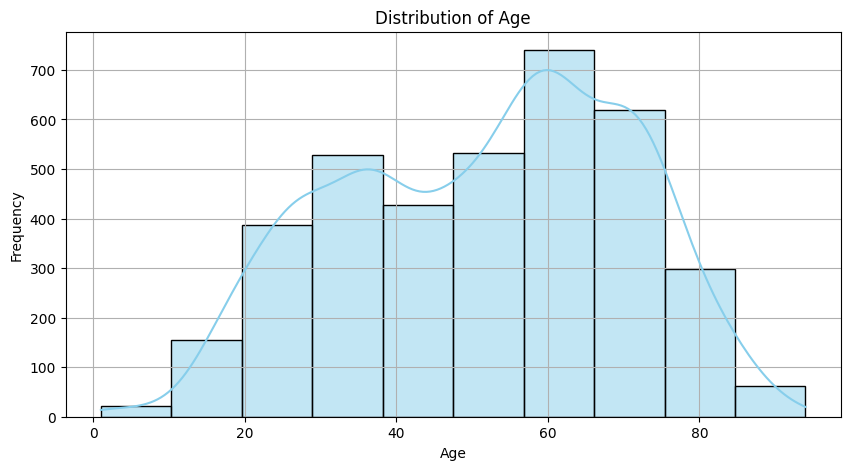

<ipython-input-12-7b8a29d71f9d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='on thyroxine', palette='Set2')


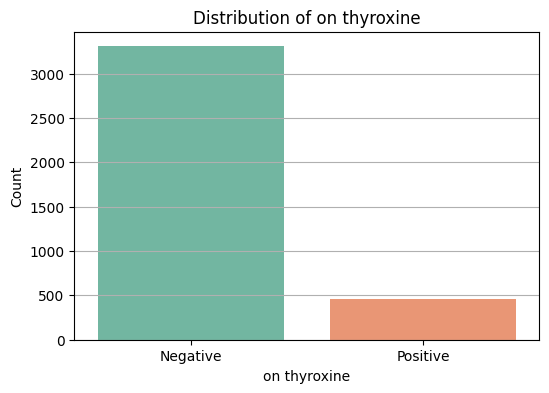

In [ ]:

# Plotting the distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print()
# Plotting the distribution of thyroxine
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='on thyroxine', palette='Set2')
plt.title('Distribution of on thyroxine')
plt.xlabel('on thyroxine')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(axis='y')
plt.show()




<ipython-input-13-e4f6019ebc4e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sick', palette='Set2')


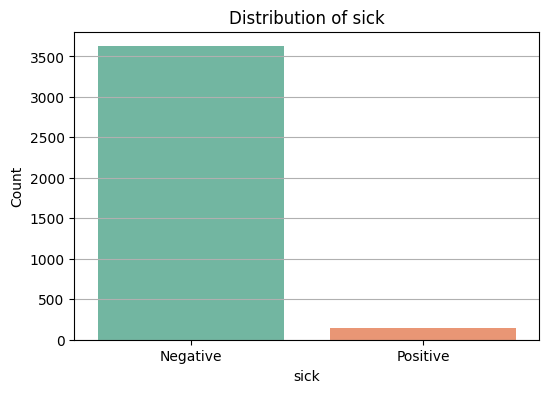

In [ ]:
# Plotting the distribution of sick
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sick', palette='Set2')
plt.title('Distribution of sick')
plt.xlabel('sick')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(axis='y')
plt.show()


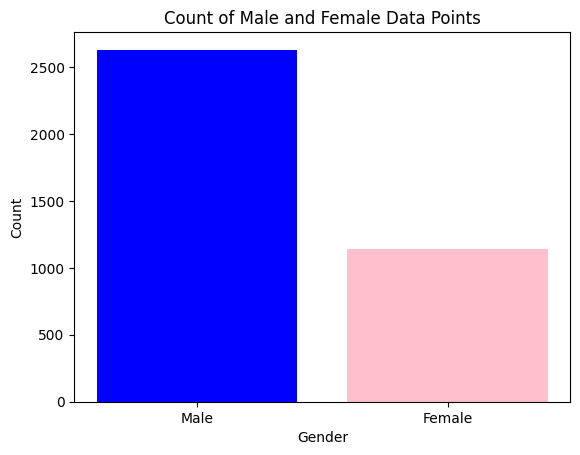

In [ ]:
# Counting male and female data points
male_count = df[df['sex'] == 0].shape[0]
female_count = df[df['sex'] == 1].shape[0]

# Plotting the counts
plt.bar(['Male', 'Female'], [male_count, female_count], color=['blue', 'pink'])
plt.title('Count of Male and Female Data Points')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

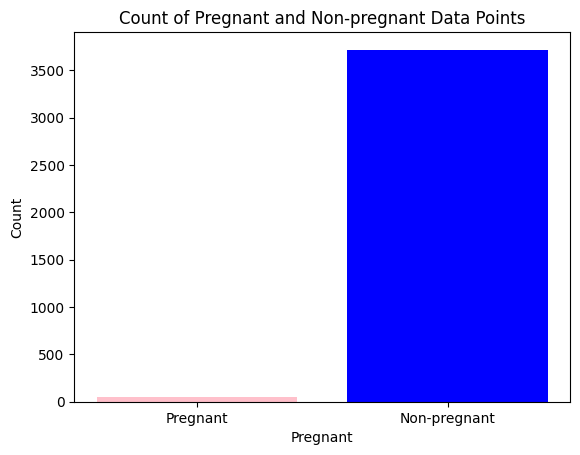

In [ ]:
# Counting pregnant and non-pregnant data points
pregnant_count = df[df['pregnant'] == True].shape[0]
non_pregnant_count = df[df['pregnant'] == False].shape[0]

# Plotting the counts
plt.bar(['Pregnant', 'Non-pregnant'], [pregnant_count, non_pregnant_count], color=['pink', 'blue'])
plt.title('Count of Pregnant and Non-pregnant Data Points')
plt.xlabel('Pregnant')
plt.ylabel('Count')
plt.show()

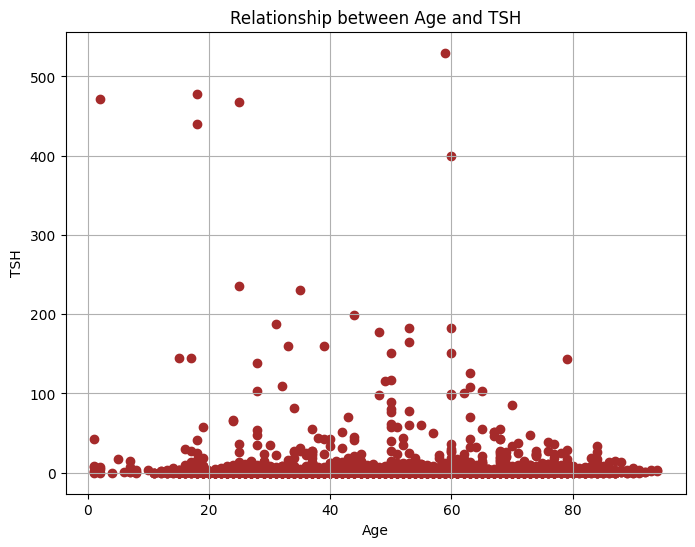

In [ ]:

# Plotting the relationship between age and TSH
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['TSH'], color='Brown')
plt.title('Relationship between Age and TSH')
plt.xlabel('Age')
plt.ylabel('TSH')
plt.grid(True)
plt.show()

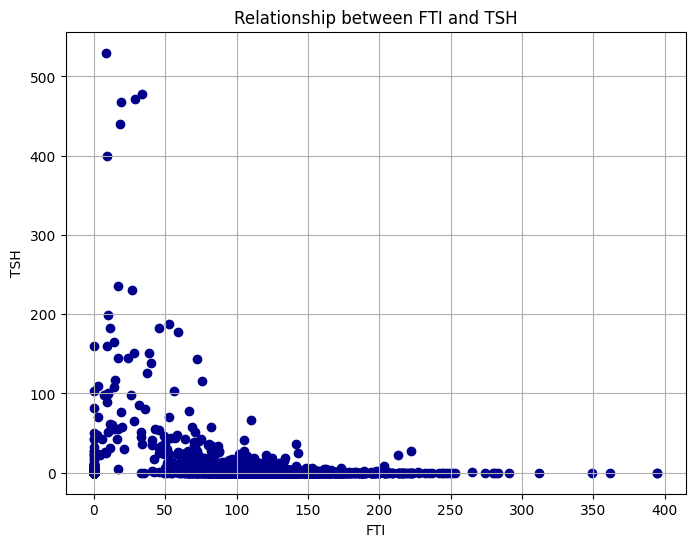

In [ ]:
# Plotting the relationship between age and TSH
plt.figure(figsize=(8, 6))
plt.scatter(df['FTI'], df['TSH'], color='DarkBlue')
plt.title('Relationship between FTI and TSH')
plt.xlabel('FTI')
plt.ylabel('TSH')
plt.grid(True)
plt.show()

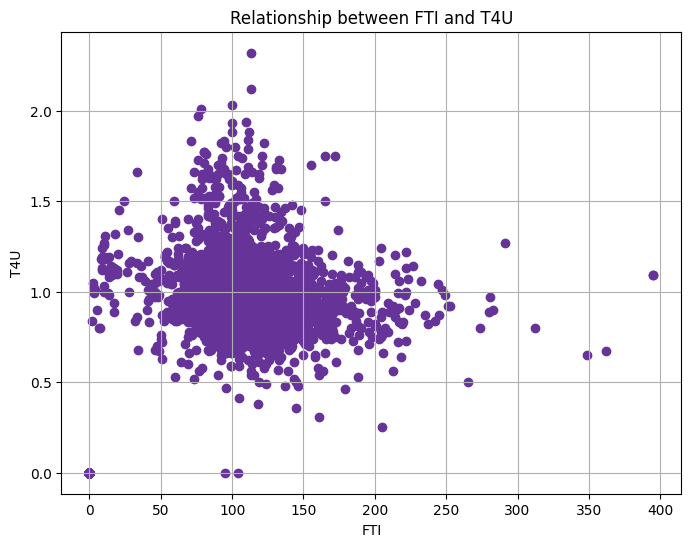

In [ ]:
# Plotting the relationship between FTI and TSH
plt.figure(figsize=(8, 6))
plt.scatter(df['FTI'], df['T4U'], color='RebeccaPurple')
plt.title('Relationship between FTI and T4U')
plt.xlabel('FTI')
plt.ylabel('T4U')
plt.grid(True)
plt.show()

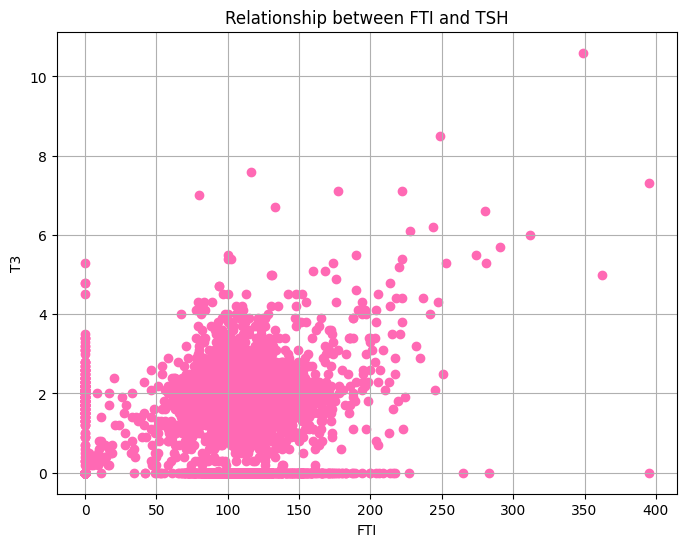

In [ ]:
# Plotting the relationship between age and TSH
plt.figure(figsize=(8, 6))
plt.scatter(df['FTI'], df['T3'], color='HotPink')
plt.title('Relationship between FTI and TSH')
plt.xlabel('FTI')
plt.ylabel('T3')
plt.grid(True)
plt.show()

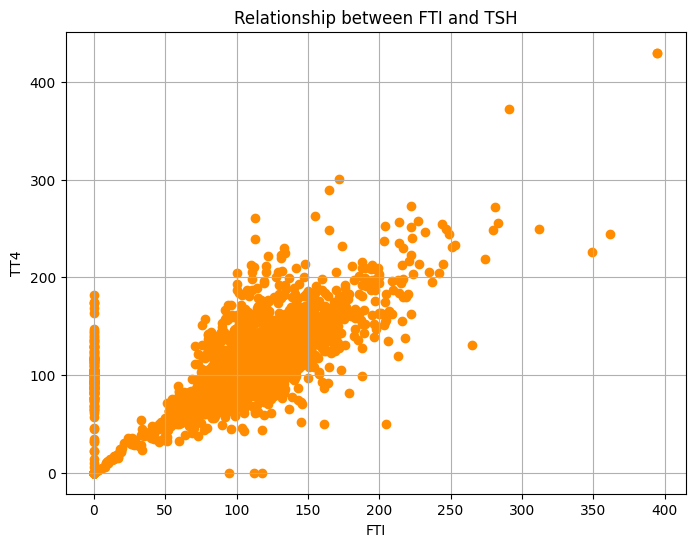

In [ ]:
# Plotting the relationship between age and TSH
plt.figure(figsize=(8, 6))
plt.scatter(df['FTI'], df['TT4'], color='DarkOrange')
plt.title('Relationship between FTI and TSH')
plt.xlabel('FTI')
plt.ylabel('TT4')
plt.grid(True)
plt.show()

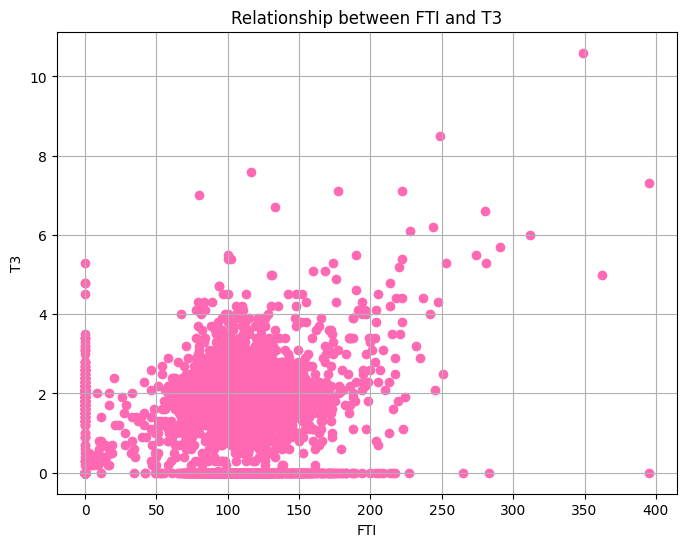

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['FTI'], df['T3'], color='HotPink')
plt.title('Relationship between FTI and T3')
plt.xlabel('FTI')
plt.ylabel('T3')
plt.grid(True)
plt.show()

#Checking all the value

In [ ]:
df= df.interpolate();
print(df)


      age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0      41    0             0                   0                          0   
1      23    0             0                   0                          0   
2      46    1             0                   0                          0   
3      70    0             1                   0                          0   
4      70    0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3766   30    0             0                   0                          0   
3767   68    0             0                   0                          0   
3768   74    0             0                   0                          0   
3769   72    1             0                   0                          0   
3770   64    0             0                   0                          0   

      sick  pregnant  thyroid surgery  I131 treatme

#Checking all the datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   int64  
 1   sex                        3771 non-null   int64  
 2   on thyroxine               3771 non-null   int64  
 3   query on thyroxine         3771 non-null   int64  
 4   on antithyroid medication  3771 non-null   int64  
 5   sick                       3771 non-null   int64  
 6   pregnant                   3771 non-null   int64  
 7   thyroid surgery            3771 non-null   int64  
 8   I131 treatment             3771 non-null   int64  
 9   query hypothyroid          3771 non-null   int64  
 10  query hyperthyroid         3771 non-null   int64  
 11  lithium                    3771 non-null   int64  
 12  goitre                     3771 non-null   int64  
 13  tumor                      3771 non-null   int64

#Converting srt to int datatype of the of Classes

In [ ]:
df['Classes'] = df['Classes'].astype(int)

#Checking datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   int64  
 1   sex                        3771 non-null   int64  
 2   on thyroxine               3771 non-null   int64  
 3   query on thyroxine         3771 non-null   int64  
 4   on antithyroid medication  3771 non-null   int64  
 5   sick                       3771 non-null   int64  
 6   pregnant                   3771 non-null   int64  
 7   thyroid surgery            3771 non-null   int64  
 8   I131 treatment             3771 non-null   int64  
 9   query hypothyroid          3771 non-null   int64  
 10  query hyperthyroid         3771 non-null   int64  
 11  lithium                    3771 non-null   int64  
 12  goitre                     3771 non-null   int64  
 13  tumor                      3771 non-null   int64

# **Correlation matrix**

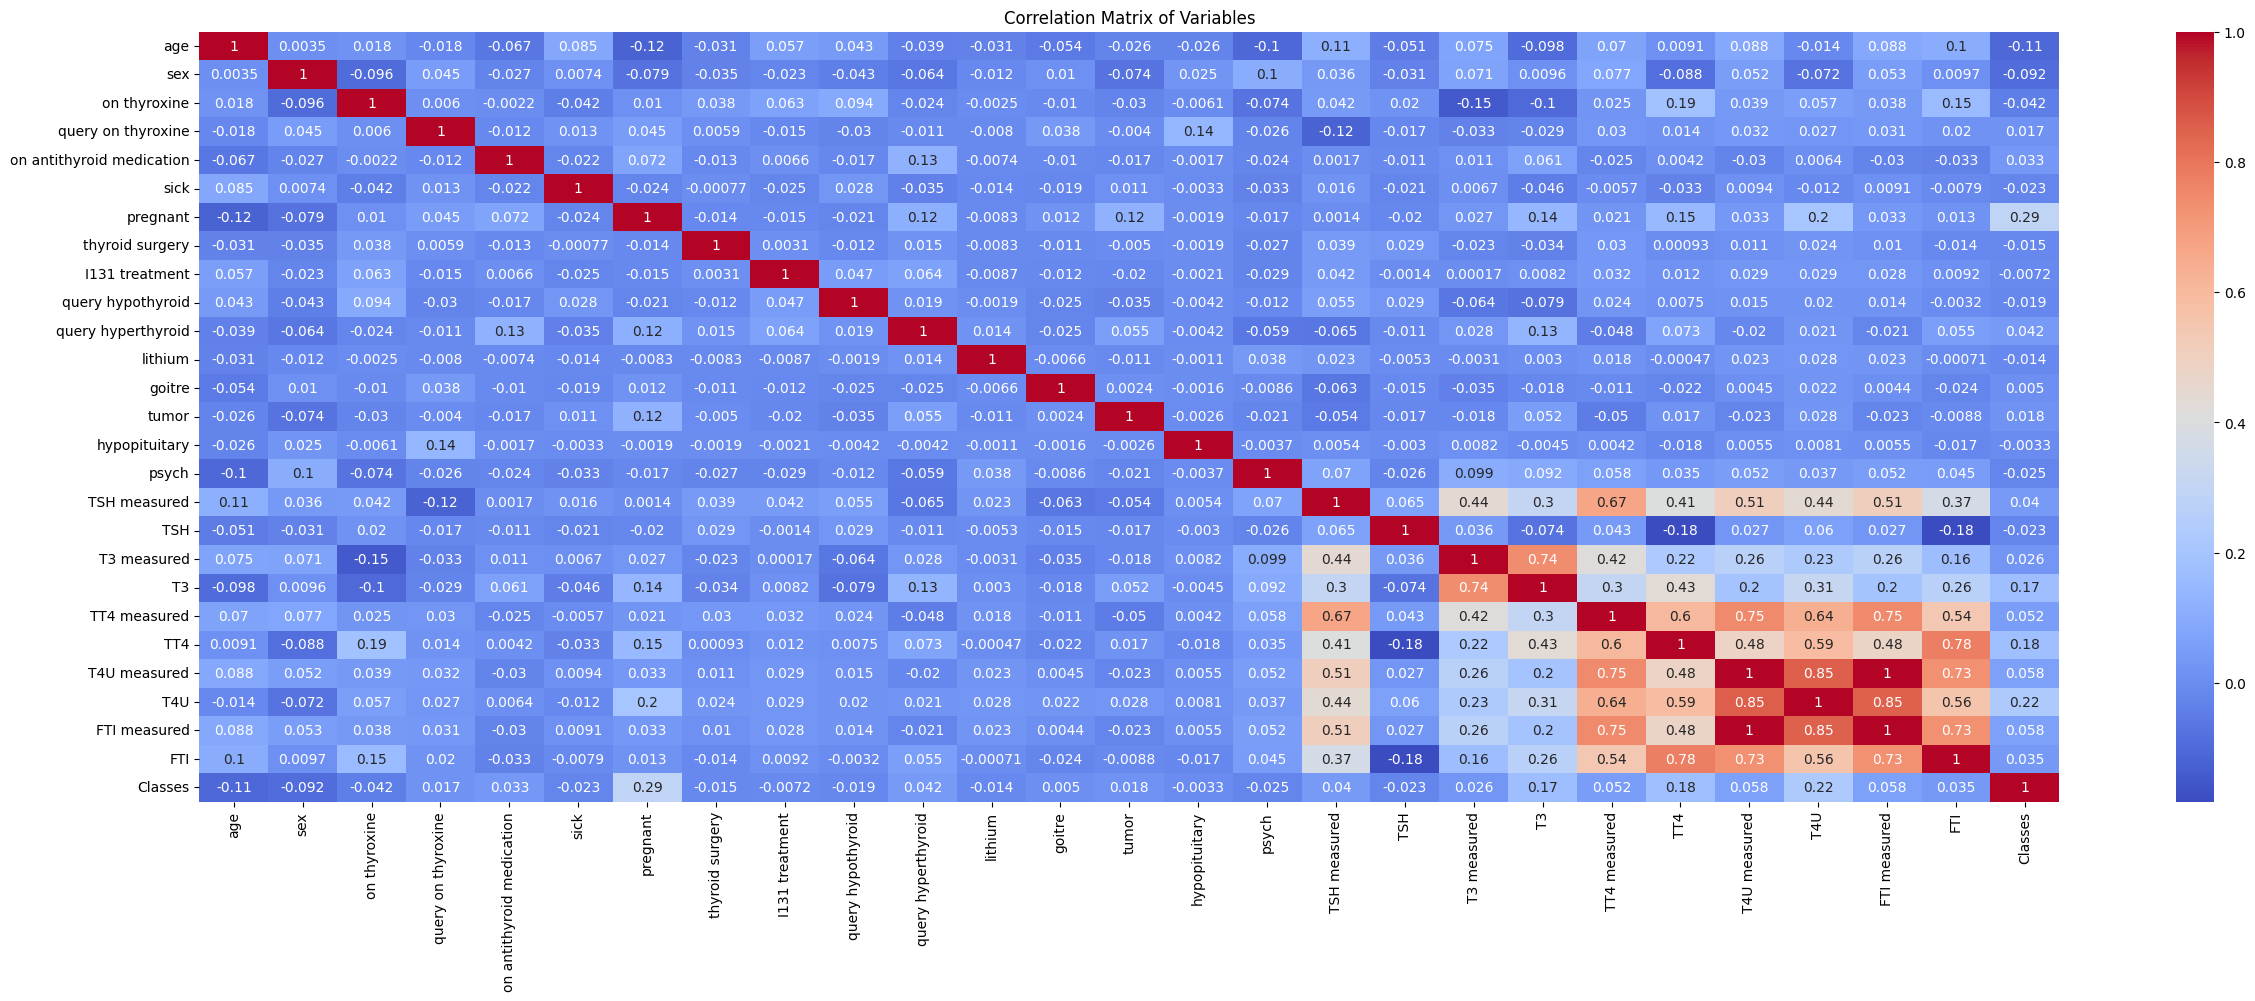

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Variables")
plt.show()

In [ ]:
from pycaret.classification import ClassificationExperiment
exp1 = ClassificationExperiment()

**Define feature matrix X and target vector y**

In [ ]:
# Define feature matrix X and target vector y
X = df.drop('Classes', axis=1)
y = df['Classes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to calculate and print the evaluation metrics

In [ ]:

def print_evaluation_metrics(y_test, y_pred, average='micro'):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average=average)}")
    print(f"Recall: {recall_score(y_test, y_pred, average=average)}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average=average)}")



# Train the models

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


# Predict the target variable for the test set using each model

In [ ]:
for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_pred = model.predict(X_test)
    print_evaluation_metrics(y_test, y_pred)
    print("\n")

Model: Logistic Regression
Accuracy: 0.9615894039735099
Precision: 0.9615894039735099
Recall: 0.9615894039735099
F1 Score: 0.9615894039735099


Model: Decision Tree
Accuracy: 0.9708609271523179
Precision: 0.9708609271523179
Recall: 0.9708609271523179
F1 Score: 0.9708609271523179


Model: Random Forest
Accuracy: 0.9788079470198675
Precision: 0.9788079470198675
Recall: 0.9788079470198675
F1 Score: 0.9788079470198675


Model: Gradient Boosting
Accuracy: 0.9788079470198675
Precision: 0.9788079470198675
Recall: 0.9788079470198675
F1 Score: 0.9788079470198675




In [ ]:
# Instantiate individual classifiers (Logistic Regression and Decision Tree)
base_classifiers = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier())
]

In [ ]:
# Create a Stacking Classifier
from sklearn.ensemble import StackingClassifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

In [ ]:
# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_predr = stacking_classifier.predict(X_test)

In [ ]:
# Predict the target variable for the test set using each model
print('combination of Logistic Regression and Decision Tree')
print_evaluation_metrics(y_test, y_predr)


combination of Logistic Regression and Decision Tree
Accuracy: 0.9708609271523179
Precision: 0.9708609271523179
Recall: 0.9708609271523179
F1 Score: 0.9708609271523179


In [ ]:
# Instantiate individual classifiers (Logistic Regression , Decision Tree , Random Forest Classifier)
base_classifiers2 = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rt' , RandomForestClassifier())
]

In [ ]:
# Create a Stacking Classifier
stacking_classifier2 = StackingClassifier(estimators=base_classifiers2, final_estimator=LogisticRegression())


In [ ]:
# Train the stacking classifier on the training data
stacking_classifier2.fit(X_train, y_train)

# Make predictions on the test set
y_predr2 = stacking_classifier2.predict(X_test)

In [ ]:
# Predict the target variable for the test set using each model
print('combination of Logistic Regression , Decision Tree and Random Fore')
print_evaluation_metrics(y_test, y_predr2)


combination of Logistic Regression , Decision Tree and Random Fore
Accuracy: 0.9801324503311258
Precision: 0.9801324503311258
Recall: 0.9801324503311258
F1 Score: 0.9801324503311258


In [ ]:
# Instantiate individual classifiers (Logistic Regression , Decision Tree , randomforest Classifier , GaussianNB)
base_classifiers3 = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rt' , RandomForestClassifier()),
    ( 'nb' , GaussianNB())
]

In [ ]:
# Create a Stacking Classifier
stacking_classifier3 = StackingClassifier(estimators=base_classifiers3, final_estimator=LogisticRegression())


In [ ]:
# Train the stacking classifier on the training data
stacking_classifier3.fit(X_train, y_train)

# Make predictions on the test set
y_predr3 = stacking_classifier3.predict(X_test)

In [ ]:
# Predict the target variable for the test set using each model
print('combination of Logistic Regression , Decision Tree and Random Fore and Naive bayes classifier')
print_evaluation_metrics(y_test, y_predr3)

combination of Logistic Regression , Decision Tree and Random Fore and Naive bayes classifier
Accuracy: 0.9788079470198675
Precision: 0.9788079470198675
Recall: 0.9788079470198675
F1 Score: 0.9788079470198675


In [ ]:

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:

# Obtain predictions from Decision Tree
dt_train_pred = dt_model.predict_proba(X_train)
dt_test_pred = dt_model.predict_proba(X_test)


In [ ]:
# Instantiate individual classifiers (Random Fore and GradientBooster clasifier and Adavooster classifier)
base_classifiers4 = [
    ('rs', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ( 'ab' ,AdaBoostClassifier())
]

In [ ]:
# Create a Stacking Classifier
stacking_classifier4 = StackingClassifier(estimators=base_classifiers4, final_estimator=RandomForestClassifier())


In [ ]:
# Train the stacking classifier on the training data
stacking_classifier4.fit(X_train, y_train)

# Make predictions on the test set
y_predr4 = stacking_classifier4.predict(X_test)

In [ ]:
# Predict the target variable for the test set using each model
print('combination of  Random Fore and GradientBooster clasifier and Adavooster classifier')
print_evaluation_metrics(y_test, y_predr4)

combination of  Random Fore and GradientBooster clasifier and Adavooster classifier
Accuracy: 0.9814569536423841
Precision: 0.9814569536423841
Recall: 0.9814569536423841
F1 Score: 0.9814569536423841


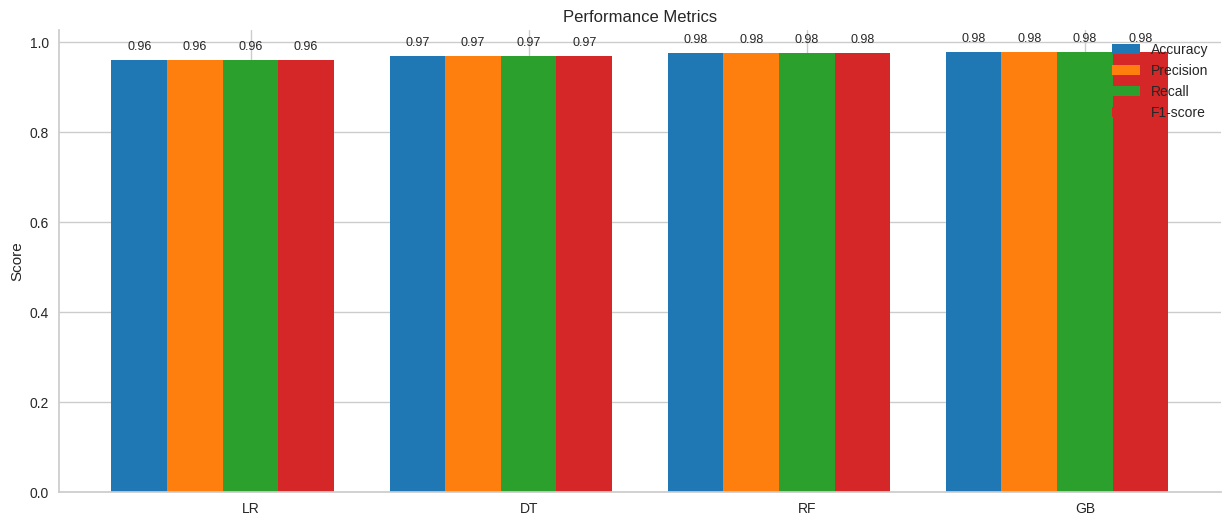

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy, Precision, Recall, and F1-score values
accuracy = [0.960,0.969, 0.976, 0.978]
precision = [0.960,0.969, 0.976, 0.978]
recall = [0.960,0.969, 0.976, 0.978]
f1_score = [0.960,0.969, 0.976, 0.978]

# Bar colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Bar positions
positions = np.arange(len(accuracy))

# Bar width
width = 0.2

# Plot the bars
rects_accuracy = ax.bar(positions - width, accuracy, width, label='Accuracy', color=colors[0])
rects_precision = ax.bar(positions, precision, width, label='Precision', color=colors[1])
rects_recall = ax.bar(positions + width, recall, width, label='Recall', color=colors[2])
rects_f1_score = ax.bar(positions + 2 * width, f1_score, width, label='F1-score', color=colors[3])

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_xticks(positions + width)
ax.set_xticklabels(['LR','DT', 'RF', 'GB'])
ax.legend()

# Add values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1_score)

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Save the plot as an image
plt.savefig('performance_metrics.png', dpi=300)

# Show the plot
plt.show()

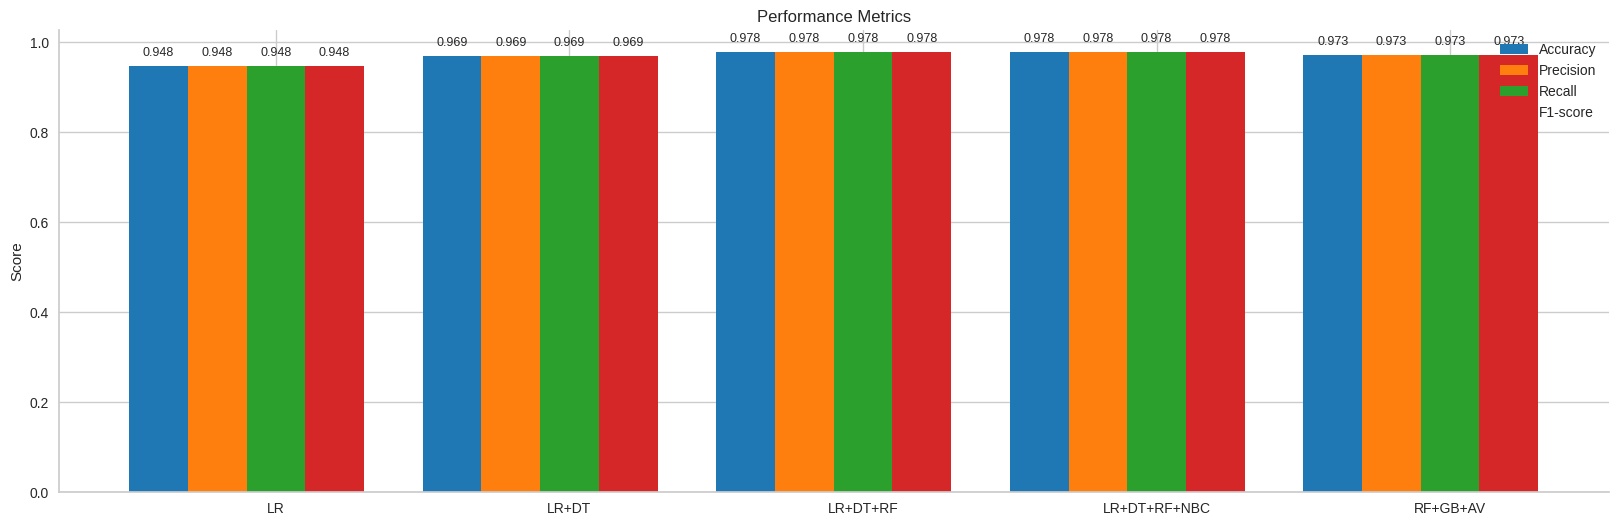

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy, Precision, Recall, and F1-score values
accuracy = [0.948,0.969, 0.978, 0.978, 0.973]
precision = [0.948,0.969, 0.978, 0.978, 0.973]
recall = [0.948,0.969, 0.978, 0.978, 0.973]
f1_score = [0.948,0.969, 0.978, 0.978, 0.973]

# Bar colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Bar positions
positions = np.arange(len(accuracy))

# Bar width
width = 0.2

# Plot the bars
rects_accuracy = ax.bar(positions - width, accuracy, width, label='Accuracy', color=colors[0])
rects_precision = ax.bar(positions, precision, width, label='Precision', color=colors[1])
rects_recall = ax.bar(positions + width, recall, width, label='Recall', color=colors[2])
rects_f1_score = ax.bar(positions + 2 * width, f1_score, width, label='F1-score', color=colors[3])

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_xticks(positions + width)
ax.set_xticklabels(['LR','LR+DT', 'LR+DT+RF', 'LR+DT+RF+NBC' ,'RF+GB+AV'])
ax.legend()

# Add values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1_score)

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Save the plot as an image
plt.savefig('performance_metrics.png', dpi=300)

# Show the plot
plt.show()

# ** We got to the graph in which all the values are the same. Now Checking dataset balance **

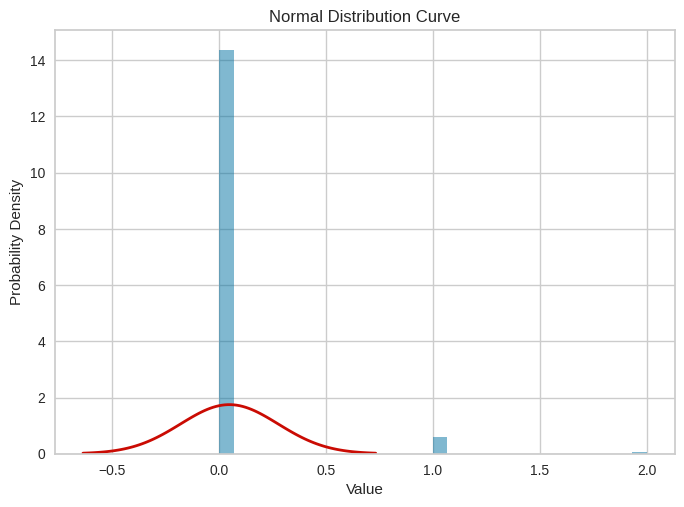

In [ ]:

# Assuming your dataset is stored in a column named 'values', you can extract it like this:
dataset = df['Classes'].values

# Calculate mean and standard deviation of the dataset
mean = np.mean(dataset)
std_dev = np.std(dataset)

# Create a range of values for the x-axis
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

# Calculate the probability density function (PDF) for each value in the range
pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Plot the dataset histogram
plt.hist(dataset, bins=30, density=True, alpha=0.5, color='b')

# Plot the normal distribution curve
plt.plot(x, pdf, color='r', linewidth=2)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Curve')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#  X = df.iloc[:, :21]   # independent
#  y = df.iloc[:, 21]    # Dependent
# Define feature matrix X and target vector y
X = df.drop('Classes', axis=1)
y = df['Classes']

In [ ]:
 X.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI'],
      dtype='object')

In [ ]:
 y

0       0
1       0
2       0
3       0
4       0
       ..
3766    0
3767    0
3768    0
3769    0
3770    0
Name: Classes, Length: 3771, dtype: int64

In [ ]:
# Using Over sampling

# strategy = {0:2427, 1:1200, 2:700, 3:300}
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_res, y_res = os.fit_resample(X, y)

<Axes: ylabel='count'>

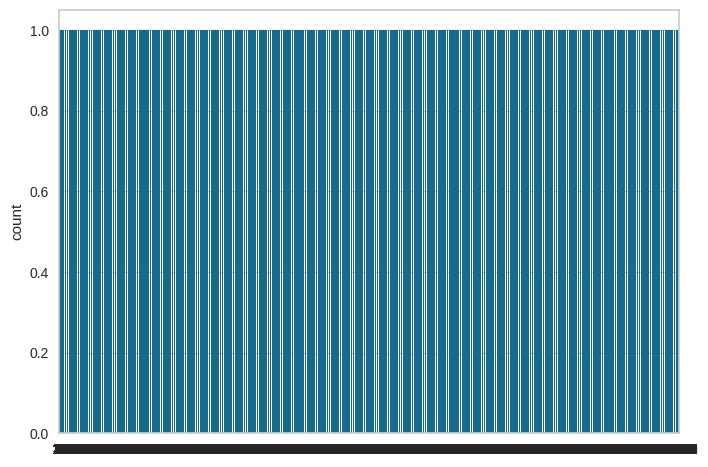

In [ ]:
# Result after balancing the data
sns.countplot(y_res)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
# Predicting using testing data
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.980     0.997     0.988       726
           1      0.875     0.519     0.651        27
           2      0.000     0.000     0.000         2

    accuracy                          0.977       755
   macro avg      0.618     0.505     0.547       755
weighted avg      0.973     0.977     0.974       755



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree classifier using the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting using testing data
y_pred = dt.predict(X_test)

In [ ]:
DecisionTreeClassifier()


DecisionTreeClassifier()

In [ ]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.986     0.981     0.983       726
           1      0.548     0.630     0.586        27
           2      1.000     1.000     1.000         2

    accuracy                          0.968       755
   macro avg      0.845     0.870     0.857       755
weighted avg      0.971     0.968     0.969       755



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampler
oversampler = RandomOverSampler()

# Perform oversampling on the training set
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize classifiers
logistic_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()

# Train Logistic Regression classifier
logistic_classifier.fit(X_resampled, y_resampled)

# Train Decision Tree classifier
dt_classifier.fit(X_resampled, y_resampled)

# Train RandomForestClassifier
rf_classifier.fit(X_resampled, y_resampled)

# Train GaussianNB classifier
nb_classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred_logistic = logistic_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracies
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Decision Tree Accuracy:", accuracy_dt)
print("RandomForestClassifier Accuracy:", accuracy_rf)
print("GaussianNB Accuracy:", accuracy_nb)

print("\n\n")
# Print classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic, digits=3))

# Print classification report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt, digits=3))

# Print classification report for RandomForestClassifier
print("Classification Report for RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf , digits=3))

# Print classification report for GaussianNB
print("Classification Report for GaussianNB:")
print(classification_report(y_test, y_pred_nb, digits=3))

Logistic Regression Accuracy: 0.871523178807947
Decision Tree Accuracy: 0.9774834437086093
RandomForestClassifier Accuracy: 0.9774834437086093
GaussianNB Accuracy: 0.1947019867549669



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0      0.995     0.871     0.929       726
           1      0.245     0.889     0.384        27
           2      0.091     1.000     0.167         2

    accuracy                          0.872       755
   macro avg      0.444     0.920     0.493       755
weighted avg      0.966     0.872     0.907       755

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0      0.984     0.993     0.988       726
           1      0.750     0.556     0.638        27
           2      1.000     1.000     1.000         2

    accuracy                          0.977       755
   macro avg      0.911     0.850     0.876       755
weighted avg      0

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load your dataset and split into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampler
oversampler = RandomOverSampler()

# Perform oversampling on the training set
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize classifiers
logistic_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()

# Create a voting classifier with Logistic Regression, Decision Tree, RandomForestClassifier, and GaussianNB
voting_classifier = VotingClassifier(
    estimators=[('lr', logistic_classifier), ('dt', dt_classifier), ('rf', rf_classifier), ('nb', nb_classifier)],
    voting='soft'  # Use soft voting for probabilities averaging
)

# Train the voting classifier on the resampled data
voting_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Print classification report
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred , digits=3))


Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0      0.993     0.974     0.983       726
           1      0.550     0.815     0.657        27
           2      0.667     1.000     0.800         2

    accuracy                          0.968       755
   macro avg      0.737     0.930     0.813       755
weighted avg      0.976     0.968     0.971       755



In [ ]:
from sklearn.metrics import classification_report

# Load your dataset and split into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampler
oversampler = RandomOverSampler()

# Perform oversampling on the training set
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize Logistic Regression and Decision Tree classifiers
logistic_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()

# Create a voting classifier with Logistic Regression and Decision Tree
voting_classifier = VotingClassifier(
    estimators=[('lr', logistic_classifier), ('dt', dt_classifier)],
    voting='soft'  # Use soft voting for probabilities averaging
)

# Train the voting classifier on the resampled data
voting_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Print classification report
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred , digits=3))


Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0      0.986     0.989     0.988       726
           1      0.708     0.630     0.667        27
           2      0.667     1.000     0.800         2

    accuracy                          0.976       755
   macro avg      0.787     0.873     0.818       755
weighted avg      0.975     0.976     0.976       755



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# Define classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Hyperparameters for Logistic Regression
    'dt__max_depth': [None, 10, 20, 30],  # Hyperparameters for Decision Tree
    'rf__n_estimators': [50, 100, 200]  # Hyperparameters for Random Forest
}

# Create a VotingClassifier instance
voting_classifier = VotingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf)
])

# Oversample the data
os = RandomOverSampler()
X_resampled, y_resampled = os.fit_resample(X, y)

# Initialize the GridSearchCV object with the voting classifier and parameter grid
grid_search = GridSearchCV(estimator=voting_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.3f}".format(grid_search.best_score_))

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best classifier
y_pred_best = best_classifier.predict(X_test)

# Print classification report for the best classifier
print("\nClassification Report for Best Classifier:")
print(classification_report(y_test, y_pred_best, digits=3))


Best Parameters:  {'dt__max_depth': None, 'lr__C': 10, 'rf__n_estimators': 100}
Best Accuracy: 0.996

Classification Report for Best Classifier:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       726
           1      1.000     1.000     1.000        27
           2      1.000     1.000     1.000         2

    accuracy                          1.000       755
   macro avg      1.000     1.000     1.000       755
weighted avg      1.000     1.000     1.000       755



In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load your dataset and split into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampler
oversampler = RandomOverSampler()

# Perform oversampling on the training set
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize classifiers
logistic_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

# Create a voting classifier with Logistic Regression, Decision Tree, and RandomForestClassifier
voting_classifier = VotingClassifier(
    estimators=[('lr', logistic_classifier), ('dt', dt_classifier), ('rf', rf_classifier)],
    voting='soft'  # Use soft voting for probabilities averaging
)

# Train the voting classifier on the resampled data
voting_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Print classification report for the hybrid classifier
print("Classification Report for Hybrid Classifier:")
print(classification_report(y_test, y_pred, digits=3))


Classification Report for Hybrid Classifier:
              precision    recall  f1-score   support

           0      0.989     0.992     0.990       726
           1      0.792     0.704     0.745        27
           2      0.667     1.000     0.800         2

    accuracy                          0.981       755
   macro avg      0.816     0.898     0.845       755
weighted avg      0.981     0.981     0.981       755



In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Load your dataset and split into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampler
oversampler = RandomOverSampler()

# Perform oversampling on the training set
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize classifiers
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
ab_classifier = AdaBoostClassifier()

# Create a voting classifier with RandomForestClassifier, GradientBoostingClassifier, and AdaBoostClassifier
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('gb', gb_classifier), ('ab', ab_classifier)],
    voting='soft'  # Use soft voting for probabilities averaging
)

# Train the voting classifier on the resampled data
voting_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Print classification report for the hybrid classifier
print("Classification Report for Hybrid Classifier:")
print(classification_report(y_test, y_pred, digits=3))


Classification Report for Hybrid Classifier:
              precision    recall  f1-score   support

           0      0.993     0.985     0.989       726
           1      0.667     0.815     0.733        27
           2      1.000     1.000     1.000         2

    accuracy                          0.979       755
   macro avg      0.887     0.933     0.907       755
weighted avg      0.981     0.979     0.980       755



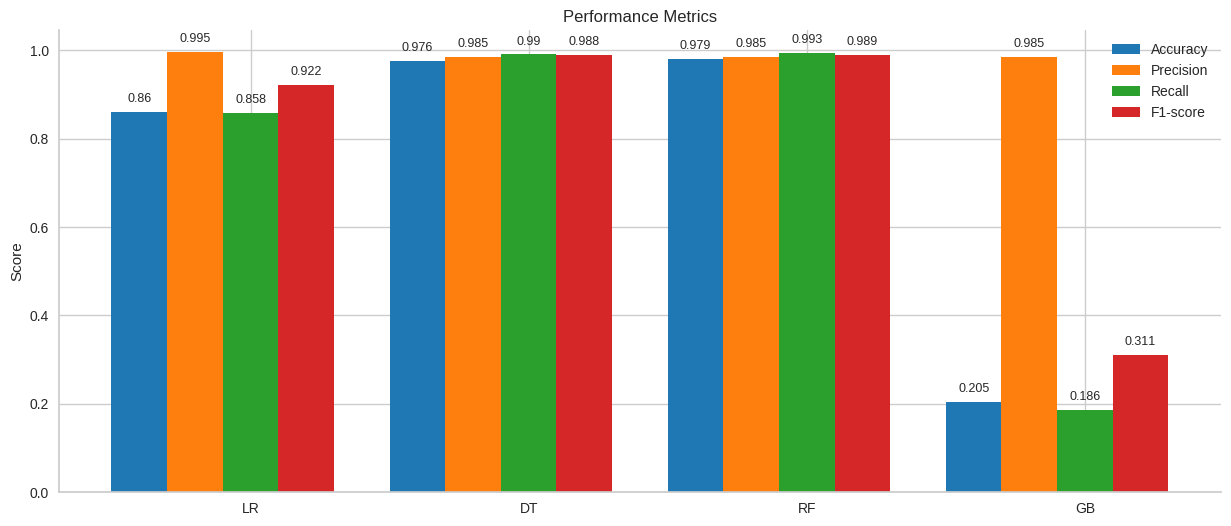

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy, Precision, Recall, and F1-score values
accuracy =  [0.860,0.976, 0.979, 0.205]
precision = [0.995,0.985, 0.985, 0.985]
recall =    [0.858,0.990, 0.993, 0.186]
f1_score =  [0.922,0.988, 0.989, 0.311]

# Bar colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Bar positions
positions = np.arange(len(accuracy))

# Bar width
width = 0.2

# Plot the bars
rects_accuracy = ax.bar(positions - width, accuracy, width, label='Accuracy', color=colors[0])
rects_precision = ax.bar(positions, precision, width, label='Precision', color=colors[1])
rects_recall = ax.bar(positions + width, recall, width, label='Recall', color=colors[2])
rects_f1_score = ax.bar(positions + 2 * width, f1_score, width, label='F1-score', color=colors[3])

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_xticks(positions + width)
ax.set_xticklabels(['LR','DT', 'RF', 'GB'])
ax.legend()

# Add values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1_score)

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Save the plot as an image
plt.savefig('performance_metrics.png', dpi=300)

# Show the plot
plt.show()

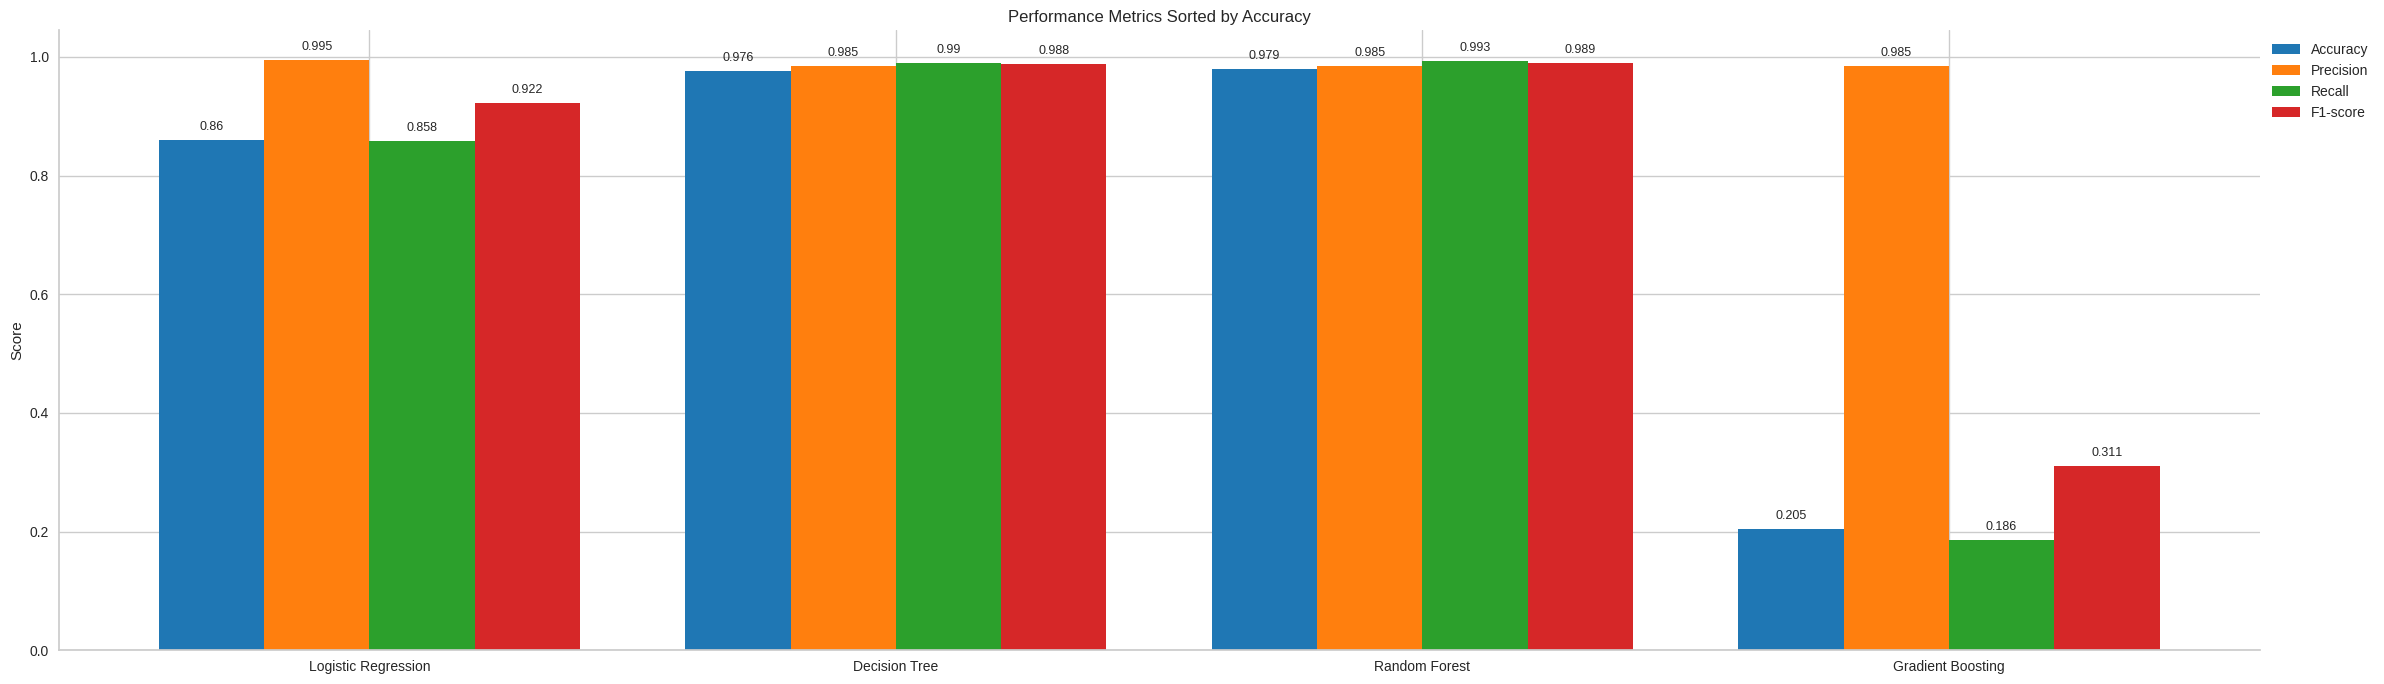

In [ ]:
# Adjusting the plot to make the LR result visible by moving the legend outside the plot area

# Create a figure and axis
fig, ax = plt.subplots(figsize=(24, 7))

# Plot the bars
rects_accuracy = ax.bar(positions - width, accuracy, width, label='Accuracy', color=colors[0])
rects_precision = ax.bar(positions, precision, width, label='Precision', color=colors[1])
rects_recall = ax.bar(positions + width, recall, width, label='Recall', color=colors[2])
rects_f1_score = ax.bar(positions + 2 * width, f1_score, width, label='F1-score', color=colors[3])

# Add labels, title, and adjust legend position
ax.set_ylabel('Score')
ax.set_title('Performance Metrics Sorted by Accuracy')
ax.set_xticks(positions + width / 2)
ax.set_xticklabels(models)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add values above the bars for clarity
autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1_score)

# Adjust plot layout to make room for the legend
plt.tight_layout()

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Save the updated plot as an image
#plt.savefig('/mnt/data/performance_metrics_sorted_updated.png', dpi=300)

# Show the updated plot
plt.show()




Trained models Table

In [ ]:
from tabulate import tabulate

data = [
    ["lr", 0.965, 0.861, 0.900, 0.861],
    ["Dt", 0.973, 0.975, 0.974, 0.975],
    ["rf", 0.977, 0.979, 0.978, 0.979],
    ["lr+dt", 0.973, 0.975, 0.974, 0.975],
    ["lr+dt+rf", 0.989, 0.992, 0.990, 0.981],
    ["rf+gb+ab", 0.979, 0.976, 0.977, 0.976],
    ["lr+dt+rf+gnb", 0.973, 0.962, 0.966, 0.962]
]

headers = ["Al", "Precision", "Recall", "F1-Score", "Accuracy"]

# Sort data based on accuracy column (index 4)
sorted_data = sorted(data, key=lambda x: x[4], reverse=True)

print(tabulate(sorted_data, headers=headers, tablefmt="grid"))


+--------------+-------------+----------+------------+------------+
| Al           |   Precision |   Recall |   F1-Score |   Accuracy |
+==============+=============+==========+============+============+
| lr+dt+rf     |       0.989 |    0.992 |      0.99  |      0.981 |
+--------------+-------------+----------+------------+------------+
| rf           |       0.977 |    0.979 |      0.978 |      0.979 |
+--------------+-------------+----------+------------+------------+
| rf+gb+ab     |       0.979 |    0.976 |      0.977 |      0.976 |
+--------------+-------------+----------+------------+------------+
| Dt           |       0.973 |    0.975 |      0.974 |      0.975 |
+--------------+-------------+----------+------------+------------+
| lr+dt        |       0.973 |    0.975 |      0.974 |      0.975 |
+--------------+-------------+----------+------------+------------+
| lr+dt+rf+gnb |       0.973 |    0.962 |      0.966 |      0.962 |
+--------------+-------------+----------+-------

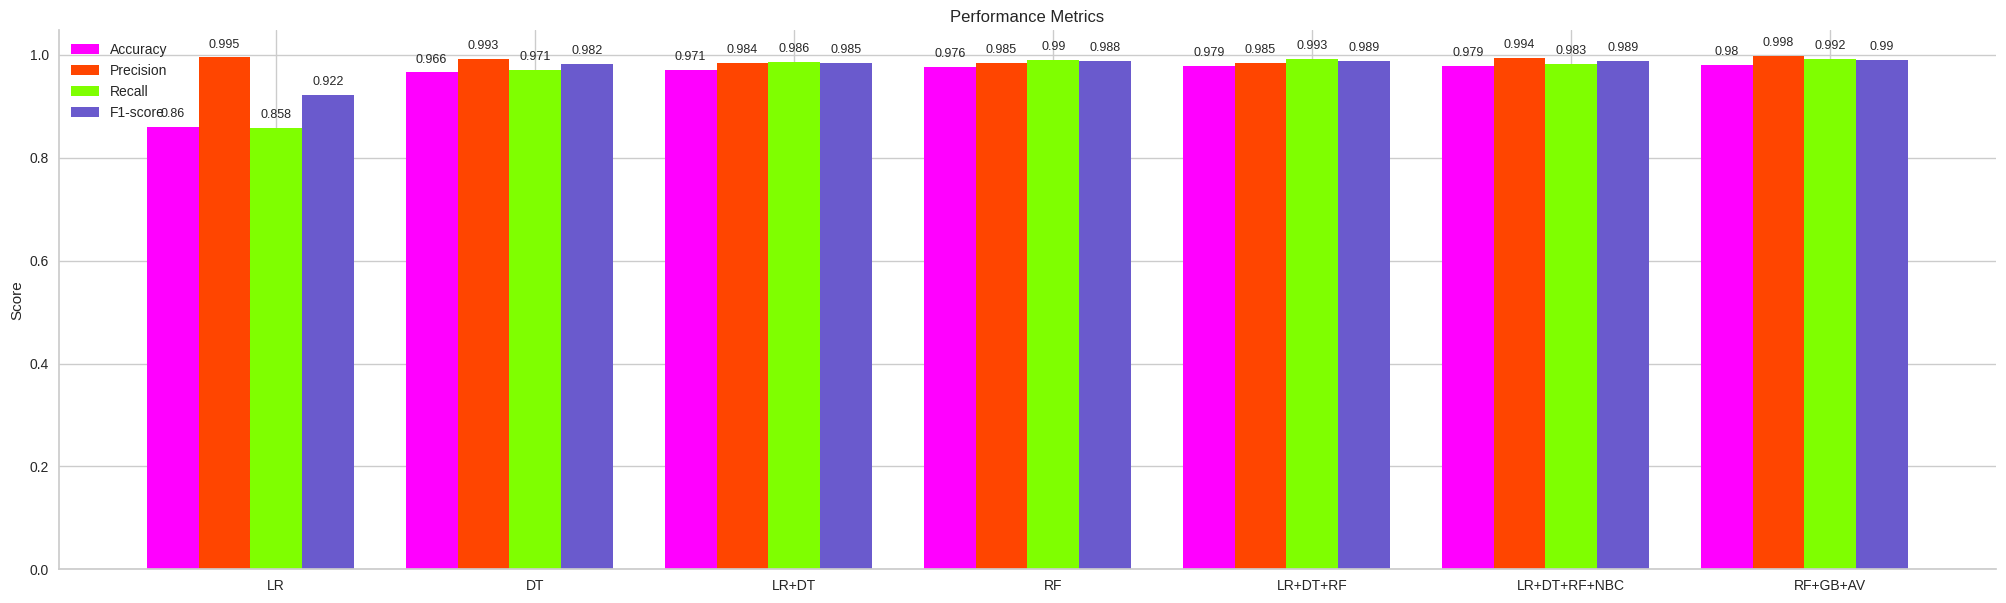

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy, Precision, Recall, and F1-score values
accuracy =  [0.860, 0.976, 0.971, 0.979, 0.980, 0.966, 0.979]
precision = [0.995, 0.985, 0.984, 0.985, 0.998, 0.993, 0.994]
recall =    [0.858, 0.990, 0.986, 0.993, 0.992, 0.971, 0.983]
f1_score =  [0.922, 0.988, 0.985, 0.989, 0.990, 0.982, 0.989]

# Bar colors
colors = ['#FF00FF', '#FF4500', '#7FFF00', '#6A5ACD']

# Sort data based on accuracy
sorted_indices = np.argsort(accuracy)
accuracy = [accuracy[i] for i in sorted_indices]
precision = [precision[i] for i in sorted_indices]
recall = [recall[i] for i in sorted_indices]
f1_score = [f1_score[i] for i in sorted_indices]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(25, 7))

# Bar positions
positions = np.arange(len(accuracy))

# Bar width
width = 0.2

# Plot the bars
rects_accuracy = ax.bar(positions - width, accuracy, width, label='Accuracy', color=colors[0])
rects_precision = ax.bar(positions, precision, width, label='Precision', color=colors[1])
rects_recall = ax.bar(positions + width, recall, width, label='Recall', color=colors[2])
rects_f1_score = ax.bar(positions + 2 * width, f1_score, width, label='F1-score', color=colors[3])

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_xticks(positions + width)
ax.set_xticklabels(['LR','DT','LR+DT','RF', 'LR+DT+RF', 'LR+DT+RF+NBC' ,'RF+GB+AV'])
ax.legend()

# Add values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1_score)

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Save the plot as an image
plt.savefig('performance_metrics.png', dpi=300)

# Show the plot
plt.show()


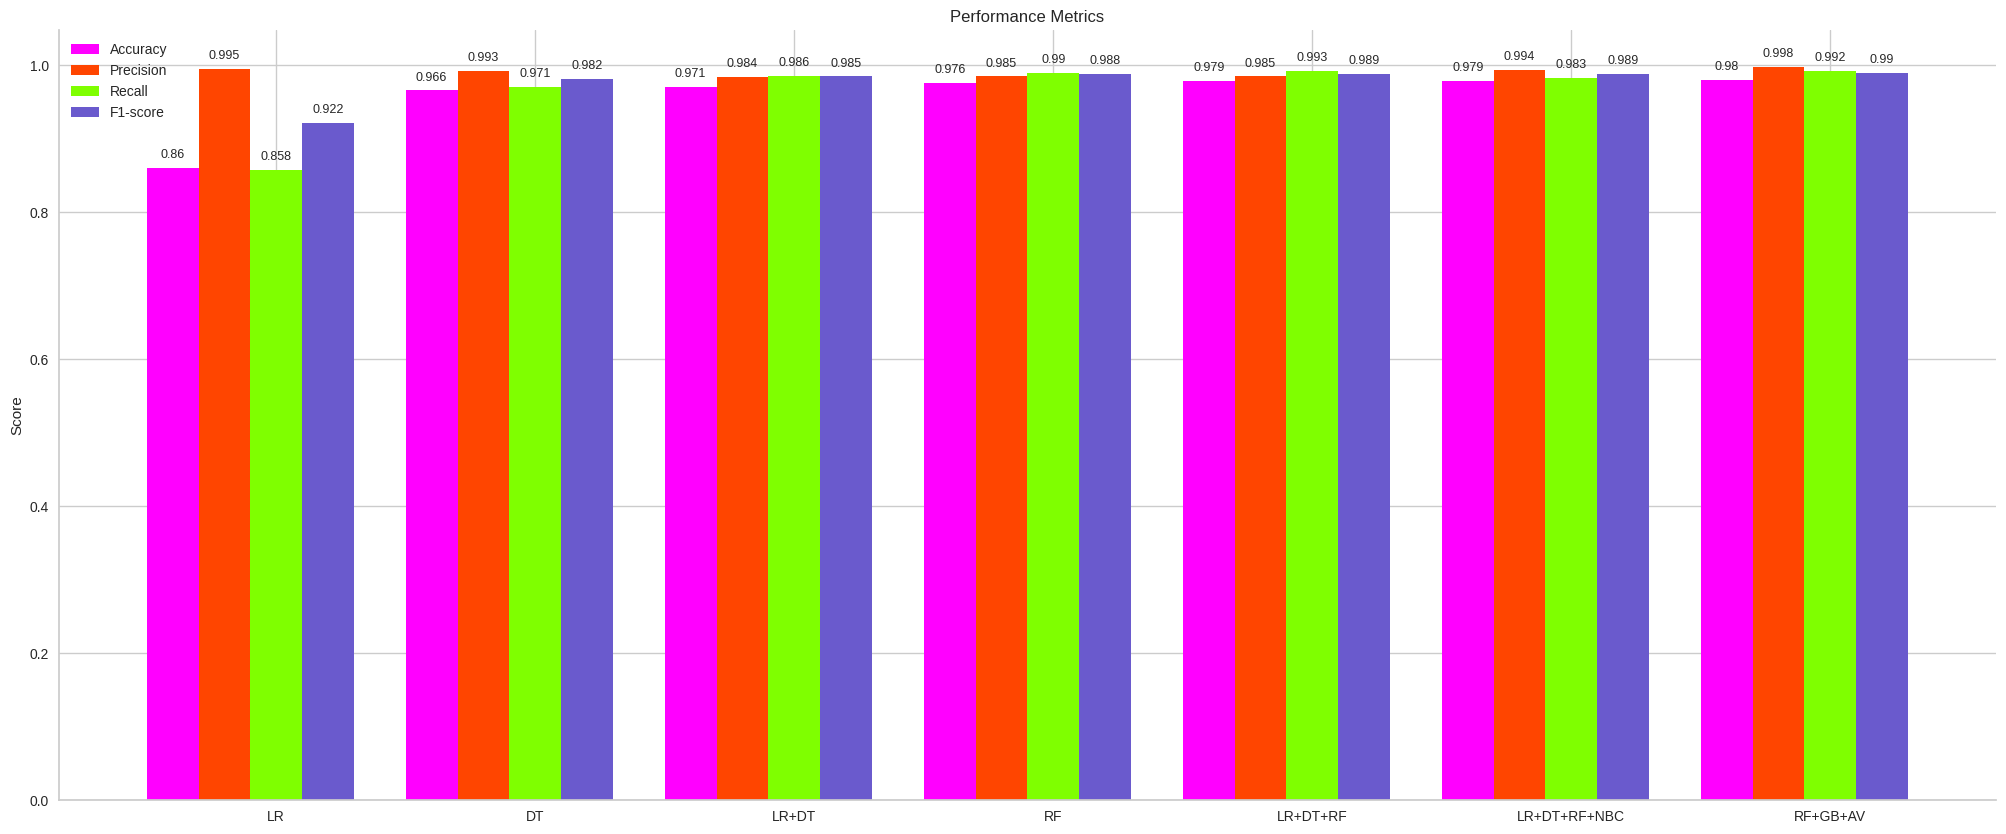

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy, Precision, Recall, and F1-score values
accuracy =  [0.860, 0.976, 0.971, 0.979, 0.980, 0.966, 0.979]
precision = [0.995, 0.985, 0.984, 0.985, 0.998, 0.993, 0.994]
recall =    [0.858, 0.990, 0.986, 0.993, 0.992, 0.971, 0.983]
f1_score =  [0.922, 0.988, 0.985, 0.989, 0.990, 0.982, 0.989]

# Bar colors
colors = ['#FF00FF', '#FF4500', '#7FFF00', '#6A5ACD']

# Sort data based on accuracy
sorted_indices = np.argsort(accuracy)
accuracy = [accuracy[i] for i in sorted_indices]
precision = [precision[i] for i in sorted_indices]
recall = [recall[i] for i in sorted_indices]
f1_score = [f1_score[i] for i in sorted_indices]

# Create a figure and axis with increased height
fig, ax = plt.subplots(figsize=(25, 10))

# Bar positions
positions = np.arange(len(accuracy))

# Bar width
width = 0.2

# Plot the bars
rects_accuracy = ax.bar(positions - width, accuracy, width, label='Accuracy', color=colors[0])
rects_precision = ax.bar(positions, precision, width, label='Precision', color=colors[1])
rects_recall = ax.bar(positions + width, recall, width, label='Recall', color=colors[2])
rects_f1_score = ax.bar(positions + 2 * width, f1_score, width, label='F1-score', color=colors[3])

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_xticks(positions + width)
ax.set_xticklabels(['LR','DT','LR+DT','RF', 'LR+DT+RF', 'LR+DT+RF+NBC' ,'RF+GB+AV'])
ax.legend()

# Add values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1_score)

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Save the plot as an image
plt.savefig('performance_metrics.png', dpi=300)

# Show the plot
plt.show()


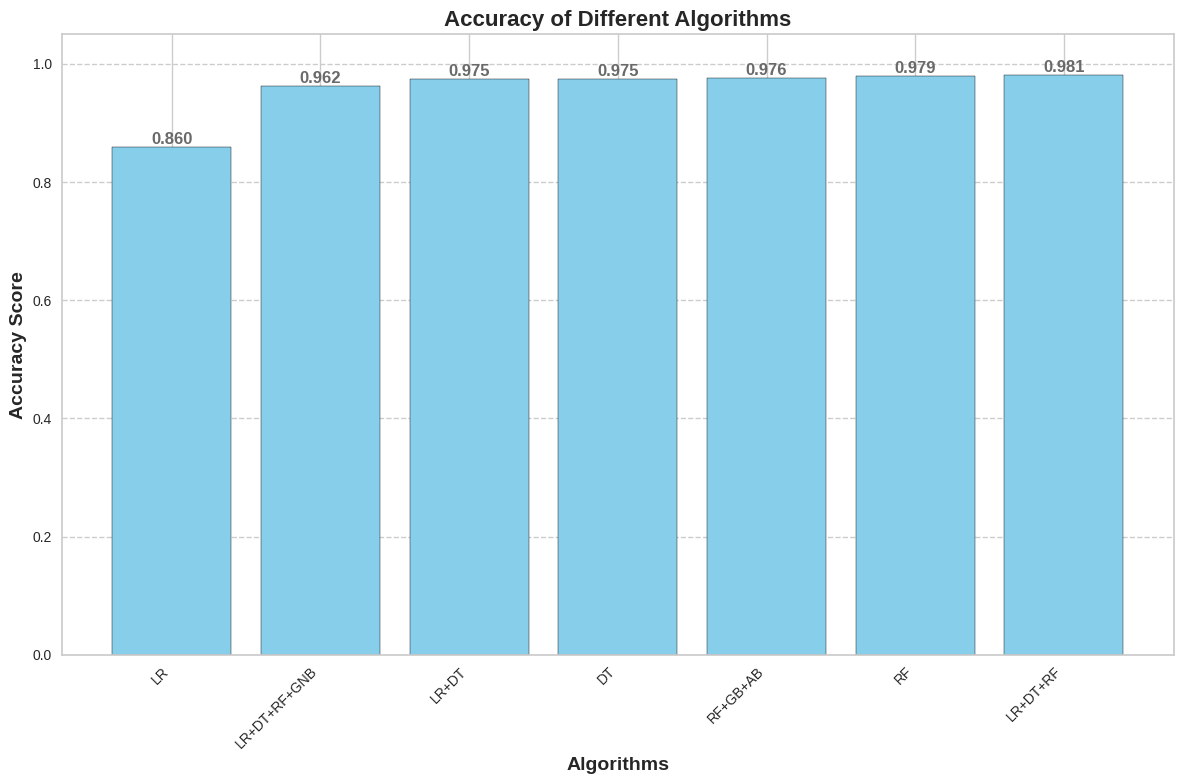

In [ ]:
import matplotlib.pyplot as plt

# Provided data
data = [
    ["LR", 0.86],
    ["LR+DT+RF+GNB",  0.962],
    ["LR+DT",  0.975],
    ["DT", 0.975],
    ["RF+GB+AB", 0.976],
    ["RF", 0.979],
    ["LR+DT+RF",  0.981]
]

# Sort data based on accuracy (last column)
sorted_data = sorted(data, key=lambda x: x[-1])

algorithms = [item[0] for item in sorted_data]
accuracy_values = [item[-1] for item in sorted_data]

# Create a more visually appealing bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(algorithms, accuracy_values, color='skyblue', edgecolor='black')

# Add accuracy values on top of each bar
for bar, acc in zip(bars, accuracy_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{acc:.3f}",
             ha='center', va='bottom', color='dimgrey', fontweight='bold')

# Enhance the visualization
plt.xlabel('Algorithms', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=14, fontweight='bold')
plt.title('Accuracy of Different Algorithms', fontsize=16, fontweight='bold')
plt.ylim(0, 1.05)  # Set the limit for y-axis to make space for text
plt.grid(axis='y', linestyle='--')  # Add grid lines on y-axis with dashed style
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels

# Enhance aesthetics with a style
plt.style.use('ggplot')

plt.show()


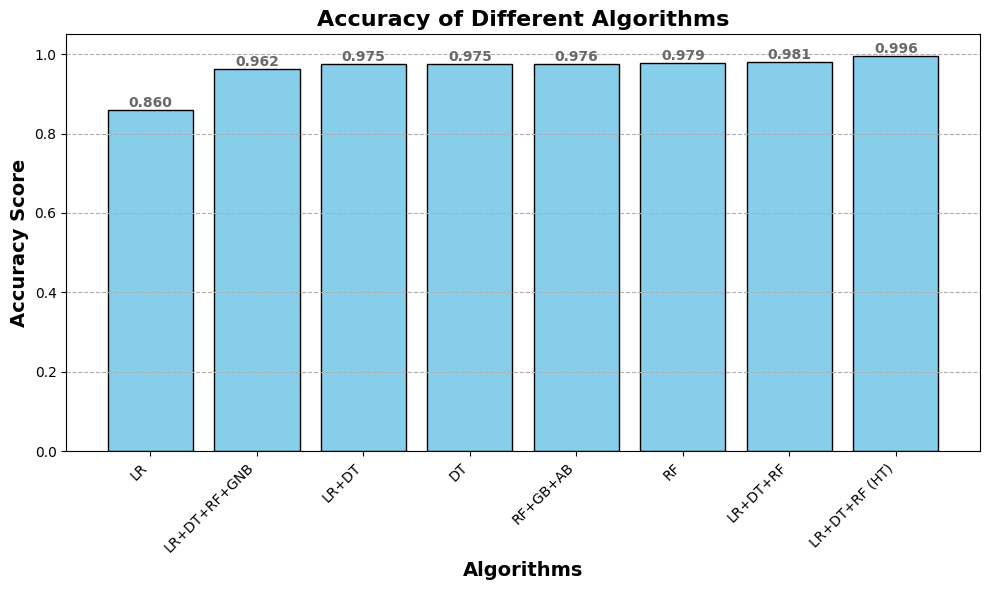

In [ ]:
import matplotlib.pyplot as plt

# Provided data
data = [
    ["LR", 0.86],
    ["LR+DT+RF+GNB",  0.962],
    ["LR+DT",  0.975],
    ["DT", 0.975],
    ["RF+GB+AB", 0.976],
    ["RF", 0.979],
    ["LR+DT+RF",  0.981],
    ["LR+DT+RF (HT)", 0.996]
]

# Sort data based on accuracy (last column)
sorted_data = sorted(data, key=lambda x: x[-1])

algorithms = [item[0] for item in sorted_data]
accuracy_values = [item[-1] for item in sorted_data]

# Create a more visually appealing bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracy_values, color='skyblue', edgecolor='black')

# Add accuracy values on top of each bar
for bar, acc in zip(bars, accuracy_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{acc:.3f}",
             ha='center', va='bottom', color='dimgrey', fontweight='bold')

# Enhance the visualization
plt.xlabel('Algorithms', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=14, fontweight='bold')
plt.title('Accuracy of Different Algorithms', fontsize=16, fontweight='bold')
plt.ylim(0, 1.05)  # Set the limit for y-axis to make space for text
plt.grid(axis='y', linestyle='--')  # Add grid lines on y-axis with dashed style
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels

# Enhance aesthetics with a style
plt.style.use('ggplot')

plt.show()
